In [30]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [31]:
df = pd.read_json('data.json')

/tmp/ipykernel_25059/373720892.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_json('data.json')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             15435 non-null  object        
 1   author            15435 non-null  object        
 2   engine            15435 non-null  object        
 3   type              15435 non-null  object        
 4   number_Km         15435 non-null  int64         
 5   gear              15435 non-null  object        
 6   status            15435 non-null  object        
 7   origin            15435 non-null  object        
 8   number_seats      15435 non-null  int64         
 9   number_door       15435 non-null  int64         
 10  price             15435 non-null  float64       
 11  exterior_color    15435 non-null  object        
 12  interior_color    15435 non-null  object        
 13  fuel_consumption  0 non-null      float64       
 14  description       1543

In [33]:
df = df.drop(['fuel_consumption', 'title','author','origin','number_door','interior_color','description','img_link','date','phone_number','link'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine          15435 non-null  object 
 1   type            15435 non-null  object 
 2   number_Km       15435 non-null  int64  
 3   gear            15435 non-null  object 
 4   status          15435 non-null  object 
 5   number_seats    15435 non-null  int64  
 6   price           15435 non-null  float64
 7   exterior_color  15435 non-null  object 
 8   car_name        15435 non-null  object 
 9   car_company     15435 non-null  object 
 10  year_man        15435 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [35]:
df.head()

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 1.6 L,Sedan,22000,Số tự động,Xe đã dùng,5,0.460,Đỏ,Cerato,Kia,2019
2,Xăng 1.5 L,Sedan,150000,Số tự động,Xe đã dùng,5,0.250,Bạc,Vios,Toyota,2008
3,Xăng 1.5 L,Crossover,0,Số tự động,Xe mới,5,0.452,Bạc,ZS,MG,2023
4,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022


In [36]:
df['exterior_color'] = df['exterior_color'].replace({'-': ''}, regex=True)

In [37]:
df = df[df['number_seats'].notna()]
df=df[(df.number_seats <= 16 ) & (df.number_seats > 1)]
df.reset_index(drop=True, inplace=True)
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 1.6 L,Sedan,22000,Số tự động,Xe đã dùng,5,0.460,Đỏ,Cerato,Kia,2019
2,Xăng 1.5 L,Sedan,150000,Số tự động,Xe đã dùng,5,0.250,Bạc,Vios,Toyota,2008
3,Xăng 1.5 L,Crossover,0,Số tự động,Xe mới,5,0.452,Bạc,ZS,MG,2023
4,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
...,...,...,...,...,...,...,...,...,...,...,...
15414,Xăng,Van/Minivan,0,Số tự động,Xe mới,7,4.370,Trắng,Alphard,Toyota,2023
15415,Xăng 3.0 L,SUV,8000,Số tự động,Xe đã dùng,5,4.550,Đen,Cayenne,Porsche,2021
15416,Xăng 2.5 L,Sedan,15000,Số tự động,Xe đã dùng,5,2.090,Đen,ES,Lexus,2021
15417,Xăng 2.0 L,Sedan,16000,Số tự động,Xe đã dùng,5,2.450,Đen,7 Series,BMW,2018


In [38]:
df = df[df['exterior_color'].notna()]

color = ['Đen', 'Đỏ', 'Bạc', 'Xanh', 'Trắng', 'Nâu', 'Cát', 'Vàng', 'Cam', 'Ghi', 'Xám', 'Đồng']

# Create an empty DataFrame to store the filtered results
filtered_df = pd.DataFrame()

# Filter the DataFrame based on exterior_color
for i in color:
    temp_df = df[df['exterior_color'] == i]
    filtered_df = pd.concat([filtered_df, temp_df])

# Reset the index of the resulting DataFrame
filtered_df.reset_index(drop=True, inplace=True)
df = filtered_df
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
2,Xăng 1.4 L,Sedan,49000,Số tự động,Xe đã dùng,5,0.350,Đen,Soluto,Kia,2020
3,Xăng 1.8 L,SUV,0,Số tự động,Xe mới,5,0.705,Đen,Corolla Cross,Toyota,2023
4,Dầu 2.0 L,SUV,35000,Số tự động,Xe đã dùng,7,0.999,Đen,Everest,Ford,2022
...,...,...,...,...,...,...,...,...,...,...,...
15360,Xăng 2.0 L,Crossover,74000,Số tự động,Xe đã dùng,8,0.520,Đồng,Innova,Toyota,2016
15361,Xăng 3.4 L,SUV,0,Số tự động,Xe mới,7,4.286,Đồng,Land Cruiser,Toyota,2023
15362,Xăng 2.0 L,Crossover,119000,Số tay,Xe đã dùng,8,0.500,Đồng,Innova,Toyota,2018
15363,Xăng 2.7 L,SUV,0,Số tự động,Xe mới,7,1.199,Đồng,Fortuner,Toyota,2023


In [39]:
df = df[df['year_man'].notna()]
df=df[(df.year_man >= 2006 )]
df.reset_index(drop=True, inplace=True)
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
2,Xăng 1.4 L,Sedan,49000,Số tự động,Xe đã dùng,5,0.350,Đen,Soluto,Kia,2020
3,Xăng 1.8 L,SUV,0,Số tự động,Xe mới,5,0.705,Đen,Corolla Cross,Toyota,2023
4,Dầu 2.0 L,SUV,35000,Số tự động,Xe đã dùng,7,0.999,Đen,Everest,Ford,2022
...,...,...,...,...,...,...,...,...,...,...,...
15179,Xăng 2.0 L,Crossover,74000,Số tự động,Xe đã dùng,8,0.520,Đồng,Innova,Toyota,2016
15180,Xăng 3.4 L,SUV,0,Số tự động,Xe mới,7,4.286,Đồng,Land Cruiser,Toyota,2023
15181,Xăng 2.0 L,Crossover,119000,Số tay,Xe đã dùng,8,0.500,Đồng,Innova,Toyota,2018
15182,Xăng 2.7 L,SUV,0,Số tự động,Xe mới,7,1.199,Đồng,Fortuner,Toyota,2023


In [40]:
df = df[df['gear'].notna()]
df=df[(df.gear == 'Số tự động' ) | (df.gear == 'Số tay')]
df.reset_index(drop=True, inplace=True)
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
2,Xăng 1.4 L,Sedan,49000,Số tự động,Xe đã dùng,5,0.350,Đen,Soluto,Kia,2020
3,Xăng 1.8 L,SUV,0,Số tự động,Xe mới,5,0.705,Đen,Corolla Cross,Toyota,2023
4,Dầu 2.0 L,SUV,35000,Số tự động,Xe đã dùng,7,0.999,Đen,Everest,Ford,2022
...,...,...,...,...,...,...,...,...,...,...,...
15178,Xăng 2.0 L,Crossover,74000,Số tự động,Xe đã dùng,8,0.520,Đồng,Innova,Toyota,2016
15179,Xăng 3.4 L,SUV,0,Số tự động,Xe mới,7,4.286,Đồng,Land Cruiser,Toyota,2023
15180,Xăng 2.0 L,Crossover,119000,Số tay,Xe đã dùng,8,0.500,Đồng,Innova,Toyota,2018
15181,Xăng 2.7 L,SUV,0,Số tự động,Xe mới,7,1.199,Đồng,Fortuner,Toyota,2023


In [41]:
df = df[df['price'].notna()]
df=df[(df.price < 10 ) & (df.price > 0.2)]
df.reset_index(drop=True, inplace=True)
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
2,Xăng 1.4 L,Sedan,49000,Số tự động,Xe đã dùng,5,0.350,Đen,Soluto,Kia,2020
3,Xăng 1.8 L,SUV,0,Số tự động,Xe mới,5,0.705,Đen,Corolla Cross,Toyota,2023
4,Dầu 2.0 L,SUV,35000,Số tự động,Xe đã dùng,7,0.999,Đen,Everest,Ford,2022
...,...,...,...,...,...,...,...,...,...,...,...
14707,Xăng 2.0 L,Crossover,74000,Số tự động,Xe đã dùng,8,0.520,Đồng,Innova,Toyota,2016
14708,Xăng 3.4 L,SUV,0,Số tự động,Xe mới,7,4.286,Đồng,Land Cruiser,Toyota,2023
14709,Xăng 2.0 L,Crossover,119000,Số tay,Xe đã dùng,8,0.500,Đồng,Innova,Toyota,2018
14710,Xăng 2.7 L,SUV,0,Số tự động,Xe mới,7,1.199,Đồng,Fortuner,Toyota,2023


In [42]:
df = df[df['number_Km'].notna()]
df=df[(df.number_Km < 6e8  )]
df.reset_index(drop=True, inplace=True)
df

,engine,type,number_Km,gear,status,number_seats,price,exterior_color,car_name,car_company,year_man
0,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
1,Xăng 2.5 L,SUV,15000,Số tự động,Xe đã dùng,7,0.888,Đen,SantaFe,Hyundai,2022
2,Xăng 1.4 L,Sedan,49000,Số tự động,Xe đã dùng,5,0.350,Đen,Soluto,Kia,2020
3,Xăng 1.8 L,SUV,0,Số tự động,Xe mới,5,0.705,Đen,Corolla Cross,Toyota,2023
4,Dầu 2.0 L,SUV,35000,Số tự động,Xe đã dùng,7,0.999,Đen,Everest,Ford,2022
...,...,...,...,...,...,...,...,...,...,...,...
14706,Xăng 2.0 L,Crossover,74000,Số tự động,Xe đã dùng,8,0.520,Đồng,Innova,Toyota,2016
14707,Xăng 3.4 L,SUV,0,Số tự động,Xe mới,7,4.286,Đồng,Land Cruiser,Toyota,2023
14708,Xăng 2.0 L,Crossover,119000,Số tay,Xe đã dùng,8,0.500,Đồng,Innova,Toyota,2018
14709,Xăng 2.7 L,SUV,0,Số tự động,Xe mới,7,1.199,Đồng,Fortuner,Toyota,2023


In [97]:
cols = (['engine', 'status', 'exterior_color','car_name','car_company','type','gear'])

lbl ={}
for i in cols:
    lbl[i] = LabelEncoder() 
    lbl[i].fit(list(df[i].values)) 
    df[i] = lbl[i].transform(list(df[i].values))
for col in cols:
    joblib.dump(lbl[col], f'label/{col}_label_encoder.pkl')

In [44]:
X = df[['engine', 'number_Km', 'status', 'number_seats', 'exterior_color', 'car_name', 'car_company', 'year_man']]
y = df[['price']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [137]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [138]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('RMSE:', metrics.mean_squared_error(y_test,predicted,squared=False))
print('R-squared:', metrics.r2_score(y_test, predicted))
result_df = pd.DataFrame({
    'MAE': [metrics.mean_absolute_error(y_test,predicted)],
    'RMSE': [metrics.mean_squared_error(y_test,predicted,squared=False)],
    'R-squared': [metrics.r2_score(y_test, predicted)]
})


Mean Absolute Error: 0.8372027436815721
RMSE: 1.2141077476212396
R-squared: 0.14959680828488375


In [139]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
predicted1 = knn_regressor.predict(X_test)

In [140]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted1))
print('RMSE:', metrics.mean_squared_error(y_test,predicted1,squared=False))
print('R-squared:', metrics.r2_score(y_test, predicted1))
result_df = result_df.append({
    'MAE': metrics.mean_absolute_error(y_test,predicted1),
    'RMSE': metrics.mean_squared_error(y_test,predicted1,squared=False),
    'R-squared': metrics.r2_score(y_test, predicted1)
}, ignore_index=True)

Mean Absolute Error: 0.7041207272315361
RMSE: 1.1496242267353105
R-squared: 0.2375309224603379


/tmp/ipykernel_25059/1226946744.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


In [141]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
predictions = gb_regressor.predict(X_test)

/home/duchan/anaconda3/envs/ki2/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('RMSE:', metrics.mean_squared_error(y_test,predictions,squared=False))
print('R-squared:', metrics.r2_score(y_test, predictions))
result_df = result_df.append({
    'MAE': metrics.mean_absolute_error(y_test,predictions),
    'RMSE': metrics.mean_squared_error(y_test,predictions,squared=False),
    'R-squared': metrics.r2_score(y_test, predictions)
}, ignore_index=True)

Mean Absolute Error: 0.26352304404505705
RMSE: 0.4587590101651996
R-squared: 0.8785829618301579


/tmp/ipykernel_25059/751554342.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


In [134]:
X = df[['engine', 'number_Km', 'status', 'number_seats', 'exterior_color', 'car_name', 'car_company', 'year_man','gear']]
y = df[['price']]

In [143]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_vali, X_test, y_vali, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [144]:
xgb_regressor = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    gamma=0,
    subsample=0.75,
    max_depth=7,
    random_state=5,
    min_child_weight=1,
    colsample_bytree=0.8
)

xgb_regressor.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_vali, y_vali)])
pre_xgb = xgb_regressor.predict(X_test)

[0]	validation_0-rmse:1.52024	validation_1-rmse:1.45881
[1]	validation_0-rmse:1.45382	validation_1-rmse:1.39682
[2]	validation_0-rmse:1.39293	validation_1-rmse:1.34008
[3]	validation_0-rmse:1.33528	validation_1-rmse:1.28579
[4]	validation_0-rmse:1.28795	validation_1-rmse:1.24056
[5]	validation_0-rmse:1.23700	validation_1-rmse:1.19444
[6]	validation_0-rmse:1.18958	validation_1-rmse:1.15178
[7]	validation_0-rmse:1.14235	validation_1-rmse:1.10869
[8]	validation_0-rmse:1.09932	validation_1-rmse:1.06881
[9]	validation_0-rmse:1.05623	validation_1-rmse:1.02941
[10]	validation_0-rmse:1.01554	validation_1-rmse:0.99253
[11]	validation_0-rmse:0.97418	validation_1-rmse:0.95459
[12]	validation_0-rmse:0.94177	validation_1-rmse:0.92460
[13]	validation_0-rmse:0.90488	validation_1-rmse:0.89163
[14]	validation_0-rmse:0.87246	validation_1-rmse:0.86276
[15]	validation_0-rmse:0.83822	validation_1-rmse:0.83118
[16]	validation_0-rmse:0.81046	validation_1-rmse:0.80421
[17]	validation_0-rmse:0.78050	validation

In [145]:
results = xgb_regressor.evals_result()
train_rmse = results["validation_0"]["rmse"]
vali_rmse = results["validation_1"]["rmse"]

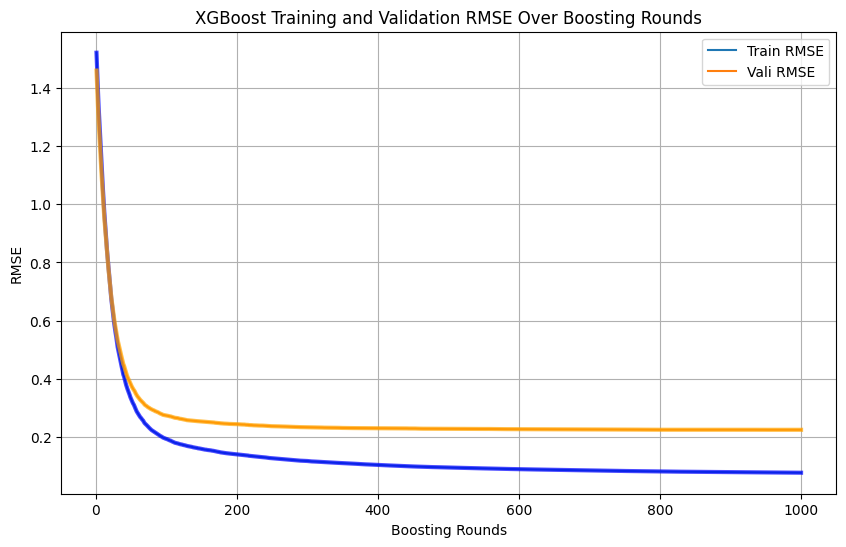

In [146]:
num_rounds = len(train_rmse)

# Plotting the training and testing RMSE over boosting rounds as a straight line
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), train_rmse, label='Train RMSE')
plt.plot(range(1, num_rounds + 1), vali_rmse, label='Vali RMSE')

# Draw a straight line to connect the points
plt.plot(range(1, num_rounds + 1), train_rmse, linestyle='-', color='blue', alpha=0.7, linewidth=3)
plt.plot(range(1, num_rounds + 1), vali_rmse, linestyle='-', color='orange', alpha=0.7, linewidth=3)

plt.title('XGBoost Training and Validation RMSE Over Boosting Rounds')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pre_xgb))
print('RMSE:', metrics.mean_squared_error(y_test,pre_xgb,squared=False))
print('R-squared:', metrics.r2_score(y_test, pre_xgb))
result_df = result_df.append({
    'MAE': metrics.mean_absolute_error(y_test,pre_xgb),
    'RMSE': metrics.mean_squared_error(y_test,pre_xgb,squared=False),
    'R-squared': metrics.r2_score(y_test, pre_xgb)
}, ignore_index=True)

Mean Absolute Error: 0.09384314841734807
RMSE: 0.2156524101081498
R-squared: 0.9744720262724099


/tmp/ipykernel_25059/3340051484.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


In [148]:
result_df.to_csv('9field.csv',index=False)

In [149]:
joblib.dump(xgb_regressor, 'xgb_model.pkl')

['xgb_model.pkl']

In [150]:
from sklearn.model_selection import KFold
import numpy as np

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
mae_scores = []

xgb_regressor = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    gamma=0,
    subsample=0.75,
    max_depth=7,
    random_state=5,
    min_child_weight=1,
    colsample_bytree=0.8
)
# Lists to store evaluation metrics for each fold
mse_scores = []

# K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train XGBRegressor
    xgb_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_regressor.predict(X_test)
    mae = metrics.mean_absolute_error(y_test,y_pred)
    rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
    r2 = metrics.r2_score(y_test, y_pred)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate the average MSE across all folds
average_mae = np.mean(mae_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

In [151]:
print(average_mae)
print(average_rmse)
print(average_r2)

0.08968107239772405
0.21562231107604474
0.9754298352997921
